<a href="https://colab.research.google.com/github/yashasvi16/Clothing/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline

In [26]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [29]:
image = io.imread('cat.jpg')

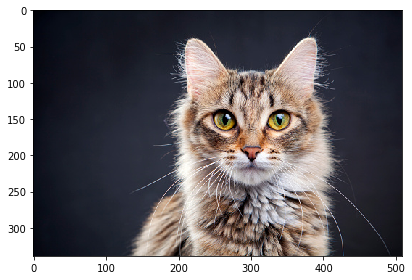

In [30]:
io.imshow(image);

In [31]:
image.shape

(339, 509, 3)

In [32]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [33]:
print(image.shape)
print(image[:5])

(172551, 3)
[[2 0 5]
 [1 0 5]
 [2 1 6]
 [2 1 7]
 [2 1 7]]


In [34]:
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(n_clusters=16)

In [35]:
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[205, 189, 181],
       [ 31,  34,  45],
       [155, 121,  98],
       [ 79,  75,  81],
       [ 11,  13,  22],
       [181, 148, 125],
       [221, 207, 203],
       [201, 172, 152],
       [ 42,  44,  58],
       [122,  90,  71],
       [173, 165, 164],
       [ 22,  24,  34],
       [237, 231, 228],
       [115, 106, 108],
       [147, 136, 135],
       [ 82,  56,  45]], dtype=uint8)

In [36]:
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(172551,)
(339, 509)


array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=uint8)

In [38]:
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('cat-compressed.png', newImage);

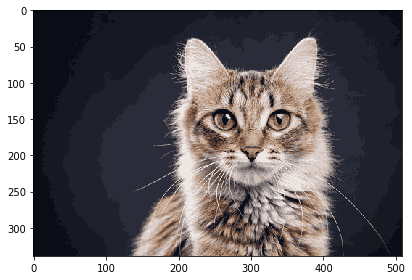

In [39]:
io.imshow(newImage);